# Analysis of Suicides in India

In [2]:
# Agenda : Identify the Trend of Suicide Cases in India

# Generate & Validate Hypothesis for reasons behind suicides

# Do demographic factors such as Geography, Work profile, Gender
# impact tendency to commit suicide?

# Does education play a role in preventing/pushing suicides?

# What are some interventions that can help lower suicide rates?

In [4]:
# load the dataset " Suicides in India_2001 - 2012".
import pandas as pd
df = pd.read_csv("Suicides_in_India_2001-2012.csv.zip")
df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [6]:
# Check the dataset values
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [ ]:
# The dataset does not have any null values.

In [7]:
# Check the data structure of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [16]:
# Lets check statistical evaluation of dataset.
df.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:xlabel='Gender', ylabel='Total'>

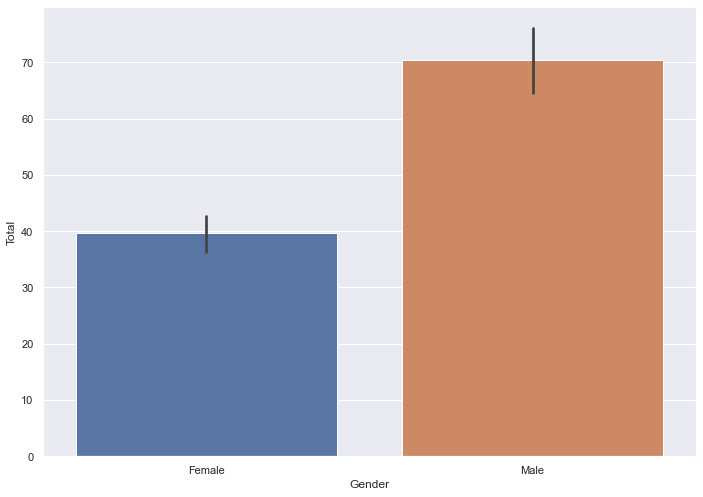

In [17]:
# Data Exploration and Data Visualization

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = df['Gender'], y = df['Total'])

# As per barplot, we can see Males are more committing suicides than women as per gender wise distribution.

In [22]:
# Next, we look at the state-wise suicide numbers to find out that the states with the highest number of suicides

grp = df.groupby('State')['Total'].sum()
total_suicides = pd.DataFrame(grp).reset_index().sort_values('Total', ascending = False)

[Text(0, 0, 'Total (All India)'),
 Text(1, 0, 'Total (States)'),
 Text(2, 0, 'Maharashtra'),
 Text(3, 0, 'West Bengal'),
 Text(4, 0, 'Tamil Nadu'),
 Text(5, 0, 'Andhra Pradesh'),
 Text(6, 0, 'Karnataka'),
 Text(7, 0, 'Kerala'),
 Text(8, 0, 'Madhya Pradesh'),
 Text(9, 0, 'Gujarat'),
 Text(10, 0, 'Chhattisgarh'),
 Text(11, 0, 'Odisha'),
 Text(12, 0, 'Rajasthan'),
 Text(13, 0, 'Uttar Pradesh'),
 Text(14, 0, 'Assam'),
 Text(15, 0, 'Haryana'),
 Text(16, 0, 'Delhi (Ut)'),
 Text(17, 0, 'Total (Uts)'),
 Text(18, 0, 'Jharkhand'),
 Text(19, 0, 'Punjab'),
 Text(20, 0, 'Bihar'),
 Text(21, 0, 'Tripura'),
 Text(22, 0, 'Puducherry'),
 Text(23, 0, 'Himachal Pradesh'),
 Text(24, 0, 'Uttarakhand'),
 Text(25, 0, 'Goa'),
 Text(26, 0, 'Jammu & Kashmir'),
 Text(27, 0, 'Sikkim'),
 Text(28, 0, 'A & N Islands'),
 Text(29, 0, 'Arunachal Pradesh'),
 Text(30, 0, 'Meghalaya'),
 Text(31, 0, 'Chandigarh'),
 Text(32, 0, 'Mizoram'),
 Text(33, 0, 'D & N Haveli'),
 Text(34, 0, 'Manipur'),
 Text(35, 0, 'Nagaland'),
 Text

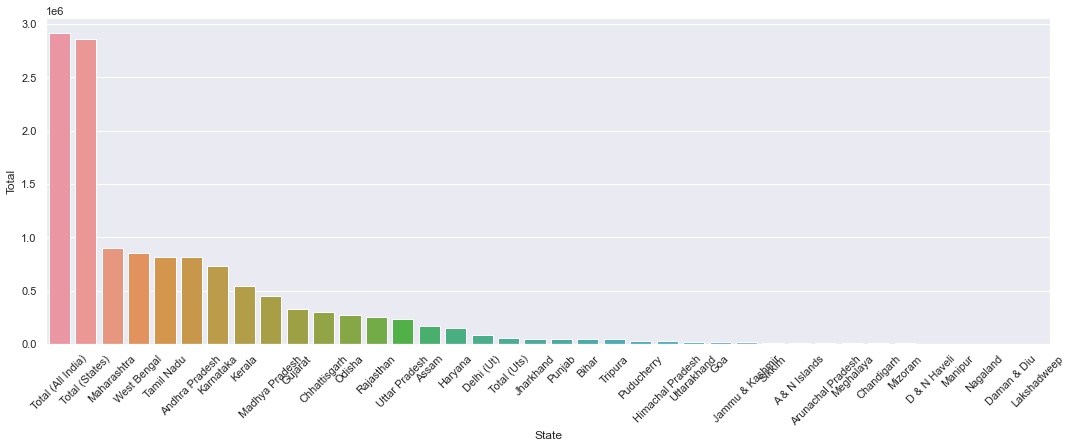

In [24]:
# Importing library for data visualization.

import matplotlib.pyplot as plt
fig , ax = plt.subplots(figsize = (18,6))
g = sns.barplot(x = 'State', y = 'Total', data = total_suicides)
g.set_xticklabels(g.get_xticklabels(), rotation = 45)

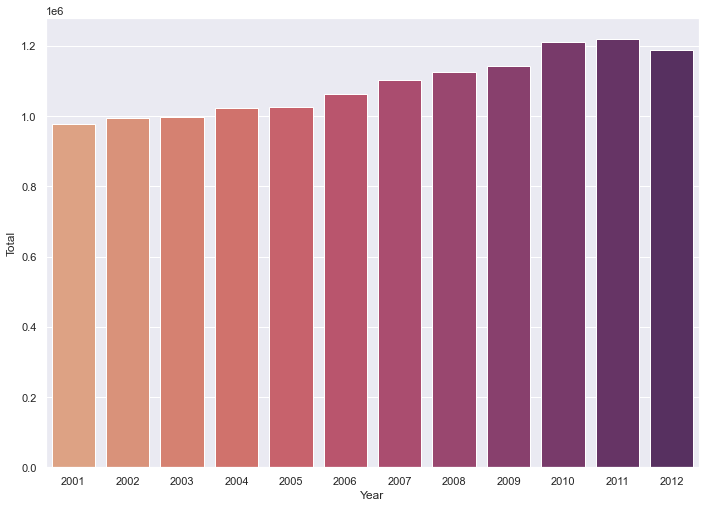

In [25]:
# Now, lets check how We see a gradual increase in the number of suicides every year.

grp_yr = df.groupby('Year')['Total'].sum()
year = pd.DataFrame(grp_yr).reset_index().sort_values('Year', ascending = False)

g = sns.barplot(x = 'Year', y = 'Total', data = year, palette = 'flare')

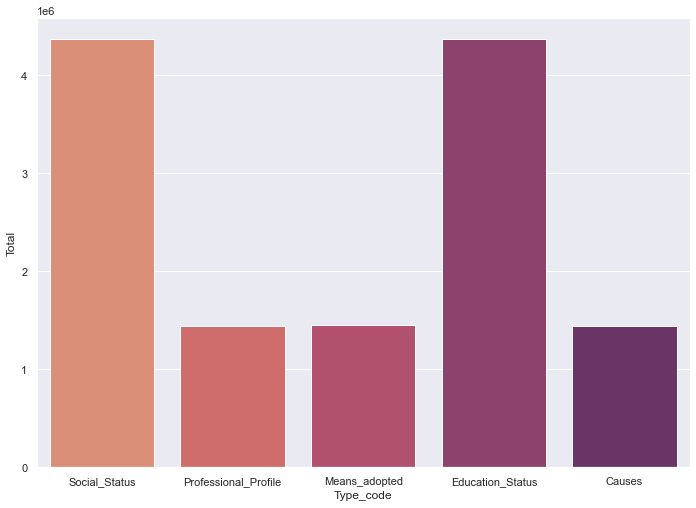

In [27]:
# Lets explore the type code feature

grp_typecode = df.groupby('Type_code')['Total'].sum()
typecode = pd.DataFrame(grp_typecode).reset_index().sort_values('Type_code', ascending = False)

g = sns.barplot(x = 'Type_code', y = 'Total', data = typecode, palette = 'flare')

In [29]:
df_by_code = df[df['Type_code'] == 'Social_Status']
df_by_code['Type'].unique()

array(['Married', 'Seperated', 'Widowed/Widower', 'Divorcee',
       'Never Married'], dtype=object)

Total people who have their social status mentioned in the data 4560


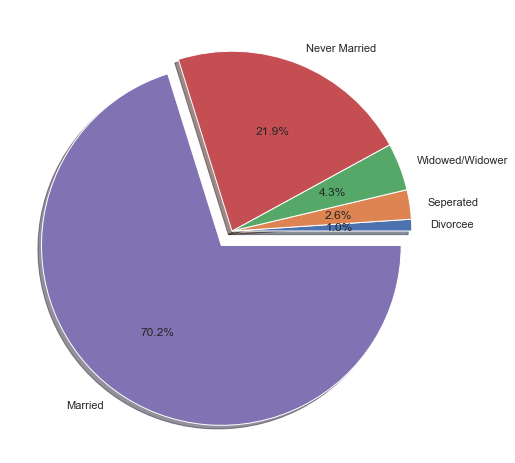

In [30]:
df_by_social = df_by_code.groupby('Type')['Total'].sum()
df_by_social_type = pd.DataFrame(df_by_social).reset_index().sort_values('Total')
print('Total people who have their social status mentioned in the data {}'.format(df_by_code.shape[0]))
labels = df_by_social_type['Type']
explode = (0,0,0,0,0.1)
plt.pie(df_by_social_type['Total'],labels = labels,autopct='%1.1f%%',explode = explode,shadow=True)
plt.show()

In [31]:
df_by_code = df[df['Type_code'] == 'Professional_Profile']
df_by_code['Type'].unique()

array(['Retired Person', 'Unemployed', 'Public Sector Undertaking',
       'Service (Private)', 'House Wife',
       'Self-employed (Business activity)', 'Professional Activity',
       'Student', 'Others (Please Specify)',
       'Farming/Agriculture Activity', 'Service (Government)'],
      dtype=object)

Total people who have their professional mentioned in the data 49263


<AxesSubplot:xlabel='Total', ylabel='Type'>

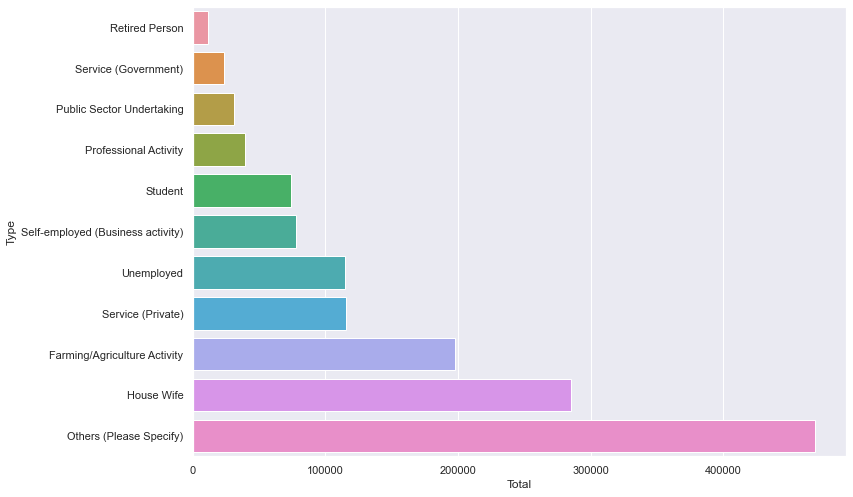

In [32]:
df_by_proffession = df_by_code.groupby('Type')['Total'].sum()
df_by_proffession_type = pd.DataFrame(df_by_proffession).reset_index().sort_values('Total')

print('Total people who have their professional mentioned in the data {}'.format(df_by_code.shape[0]))
sns.barplot(x = df_by_proffession_type['Total'], y = df_by_proffession_type['Type'])

In [34]:
# Now, lets check how education is affecting suicides.

df_by_code = df[df['Type_code'] == 'Education_Status']
df_by_code['Type'].unique()

array(['Diploma', 'No Education', 'Post Graduate and Above', 'Middle',
       'Graduate', 'Hr. Secondary/Intermediate/Pre-Universit', 'Primary',
       'Matriculate/Secondary'], dtype=object)

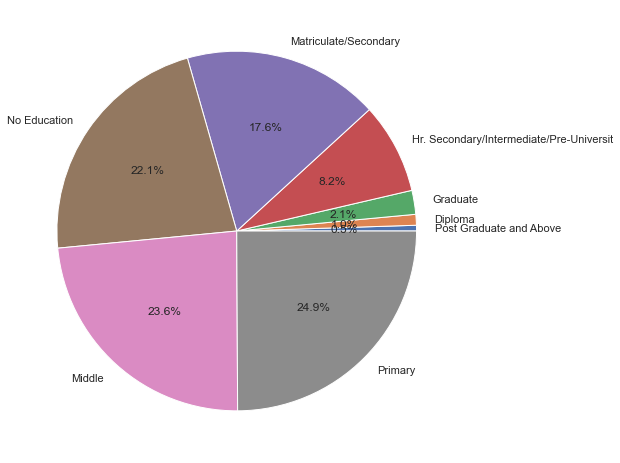

In [35]:
df_by_education = df_by_code.groupby('Type')['Total'].sum()
df_by_education_type = pd.DataFrame(df_by_education).reset_index().sort_values('Total')
#print('Total people who have their social status mentioned in the data {}'.format(df_by_code.shape[0]))
labels = df_by_education_type['Type']

plt.pie(df_by_education_type['Total'],labels = labels,autopct='%1.1f%%')
plt.show()

In [ ]:
# What are some interventions that can help lower suicide rates?

# Top causes of suicide are

# 1) Family Problems 2) Prolonged Illness 3) Mental Illness 4) Love affairs 5) Bankruptcy or sudden change in economic status

# We need to resolve problems those causes more numbers of suicides.

# Thank You